# Feature annotation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import lamindb as db
from lamindb.do import ingest
import bionty as bt
from nbproject import header

header()

id,oYcJlpQohwcq
version,draft
time_init,2022-07-19 14:48
time_run,2022-07-20 05:57
pypackage,bionty==0.0.6+17.g0499eed lamindb==0.0.9 lamindb_schema==0.0.2 nbproject==0.4.1 scanpy==1.8.2


## Data

In [3]:
adata = sc.datasets.pbmc68k_reduced()
adata.var = bt.Gene().curate(adata.var)

🔶 62 terms (8.1%) are not mappable.


In [4]:
adata.var.head()

,n_counts,means,dispersions,dispersions_norm,highly_variable,orig_index,__curated__
index,,,,,,,
HES4,1153.387451,0.592365,2.028047,2.771764,True,HES4,True
TNFRSF4,304.358154,0.193332,1.760724,2.746426,True,TNFRSF4,True
SSU72,2530.272705,1.019981,1.208284,-0.631160,False,SSU72,True
PARK7,7451.664062,1.828078,1.288261,-0.544716,False,PARK7,True
RBP7,272.811035,0.174943,1.842789,3.192285,True,RBP7,True


In [5]:
filename = "scanpy_pbmc68k_reduced.h5ad"
adata.write(filename)

## Ingest features

In [6]:
ingest.add(filename)

In [7]:
ingest.status

{PosixPath('scanpy_pbmc68k_reduced.h5ad'): ('gKiz7QSmdwoJcLTZwuWl', '1')}

In [11]:
! lndb init --storage $HOME/mydata

ℹ️ | Created instance mydata: /Users/sunnysun/mydata/mydata.lndb


In [12]:
ingest.status

{PosixPath('scanpy_pbmc68k_reduced.h5ad'): ('gKiz7QSmdwoJcLTZwuWl', '1')}

In [13]:
from lamindb_schema import dobject

dobj = dobject(
    id="gKiz7QSmdwoJcLTZwuWl", v="1", name="scanpy_pbmc68k_reduced", file_suffix=".h5ad"
)

In [14]:
ingest.commit()

ℹ️ Added notebook 'Feature annotation' (oYcJlpQohwcq, draft) by user xiaoji.sun515@gmail.com (BjExb4ik).
✅ Ingested the following files:
+-------------------------------------------------------+--------------------------------------------+------------------------------------+
|                     Ingested File                     |                  Notebook                  |                User                |
+-------------------------------------------------------+--------------------------------------------+------------------------------------+
| scanpy_pbmc68k_reduced.h5ad (gKiz7QSmdwoJcLTZwuWl, 1) | 'Feature annotation' (oYcJlpQohwcq, draft) | xiaoji.sun515@gmail.com (BjExb4ik) |
+-------------------------------------------------------+--------------------------------------------+------------------------------------+
🔶 Consider using Jupyter Lab for ingesting data!
    Interactive notebook integrity checks are currently only supported on Jupyter Lab.
    Alternatively, manually

RuntimeError: Make sure you save the notebook in your editor before publishing!
You can avoid the need for manually saving in Jupyter Lab, which auto-saves the buffer during publish.

In [15]:
from lamindb.meta import annotate

In [19]:
genes = annotate.gene(dobj, obs_or_var="var")

In [21]:
genes["HES4"]

'mdqYGEjG8RP2aHF35CZPGP4G'

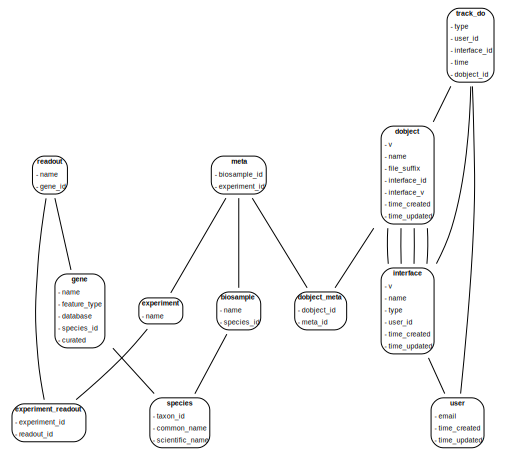

In [4]:
db.track.schema.diagram()